<a href="https://colab.research.google.com/github/vethssvikas/Traffic-Recognition/blob/main/Traffic_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.p to train.p


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.p to test.p


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving valid.p to valid.p


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving signnames.csv to signnames.csv


In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot
import tensorflow as tf

In [ ]:
from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]
training_file = "train.p"
testing_file = "test.p"
train_balanced_dataset_file = "valid.p"



In [ ]:
!pip install nolearn

In [ ]:
!pip install --upgrade https://github.com/Theano/Theano/archive/master.zip
!pip install --upgrade https://github.com/Lasagne/Lasagne/archive/master.zip

  Using cached https://github.com/Theano/Theano/archive/master.zip
  Created wheel for Theano: filename=Theano-1.0.5+unknown-cp37-none-any.whl size=2667299 sha256=2733e3bab9cef762926966ab7c08ef0326dc74370c0e178c61f0a8b3bbd6f6dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-fij9g8jr/wheels/33/73/96/0ed263c62a86e2485ea634e0d3ae8169d50fd66e3b252541db
Successfully built Theano
  Found existing installation: Theano 1.0.5+unknown
    Uninstalling Theano-1.0.5+unknown:
      Successfully uninstalled Theano-1.0.5+unknown
  Using cached https://github.com/Lasagne/Lasagne/archive/master.zip
  Created wheel for Lasagne: filename=Lasagne-0.2.dev1-cp37-none-any.whl size=122807 sha256=1adf7ee4b8c114fee0e770aeb026eb955d2b787e84d6737b56b7d632df369688
  Stored in directory: /tmp/pip-ephem-wheel-cache-fywbwvo1/wheels/ca/4a/00/87f1777b229481fe76562df7c0cfb993bc88ed0cc37e3f0ed4
Successfully built Lasagne
  Found existing installation: Lasagne 0.2.dev1
    Uninstalling Lasagne-0.2.dev1:
      Successfu

In [ ]:
pip install tensorflow==1.13.2

     |████████████████████████████████| 92.7MB 38kB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 368kB 37.4MB/s 
     |████████████████████████████████| 3.2MB 30.6MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.13.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [ ]:
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import warnings
from skimage import exposure
# Load pickled data
import pickle

matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X, y = train['features'], train['labels']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=4000, random_state=0)

X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
N_CLASSES = np.unique(y_train).size  # keep this for later

X_train shape: (30799, 32, 32, 3)
y_train shape: (30799,)
X_valid shape: (4000, 32, 32, 3)
y_valid shape: (4000,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


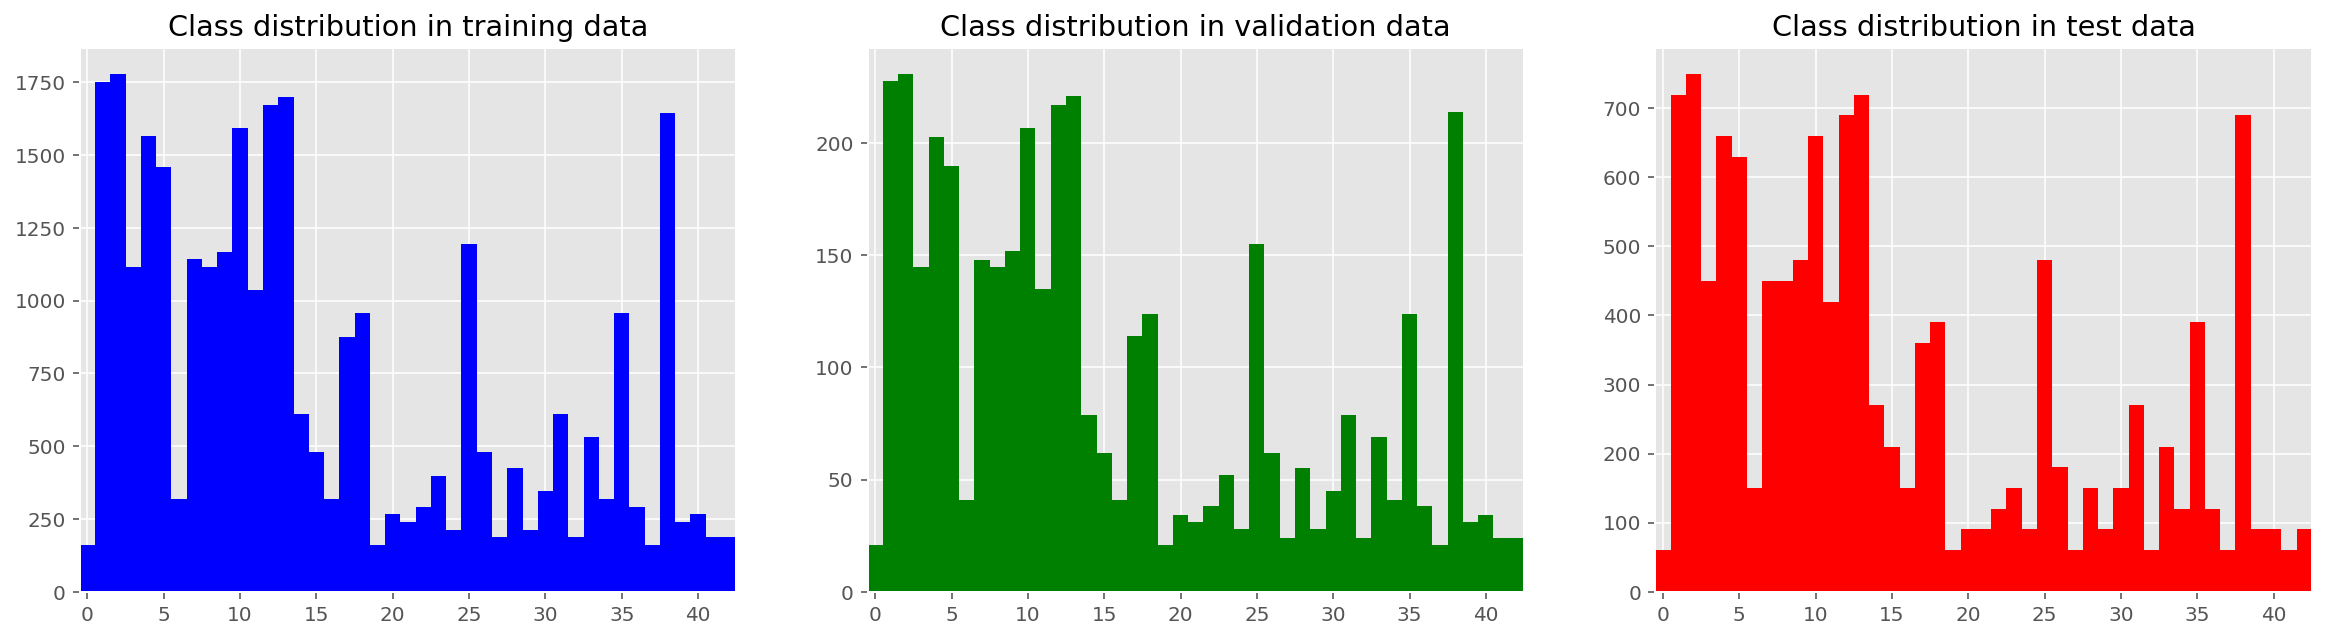

In [ ]:
def plot_dist(y_data, title=None, ax=None, **kwargs):
    '''
    Plot the traffic sign class distribution
    '''
    if not ax :
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, N_CLASSES+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5,N_CLASSES-0.5)
    if 'label' in kwargs : ax.legend()
    if title : ax.set_title(title)
        
fig,ax = plt.subplots(1,3, figsize=(20,5))
plot_dist(y_train, title='Class distribution in training data', ax=ax[0], color='blue')
plot_dist(y_valid, title='Class distribution in validation data', ax=ax[1], color='green')
plot_dist(y_test, title='Class distribution in test data', ax=ax[2], color='red')


In [ ]:
## let's create a pandas dataframe to load csv

sign_name_df = pd.read_csv('signnames.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId',inplace=True)
sign_name_df.head()

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)


In [ ]:
## Helper function for finding lables for class-id (later used)
def get_name_from_label(label):
    # Helper, transofrm a numeric label into the corresponding strring
    return sign_name_df.loc[label].SignName

In [ ]:
def show_learning_curve(train, valid, epochs=range(1, 21, 1)):
    plt.figure(figsize=(10, 10))
    plt.plot(epochs, train, label='train')
    plt.plot(epochs, valid, label='validation')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.xticks(epochs)
    plt.legend(loc='center right')

def plot_confusion_matrix(cm):
    cm = [row/sum(row)   for row in cm]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Oranges)
    fig.colorbar(cax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class IDs')
    plt.ylabel('True Class IDs')
    plt.show()

def print_confusion_matrix(cm, sign_names=SIGN_NAMES):
    results = [(i, SIGN_NAMES[i], row[i]/sum(row)*100) for i, row in enumerate(cm)]
    accuracies = []
    for result in sorted(results, key=lambda x: -x[2]):
        print('{:>2} {:<50} {:6.2f}% {:>4}'.format(*result, sum(y_train==result[0])))
        accuracies.append(result[2])
    print('-'*50)
    print('Accuracy: Mean: {:.3f} Std: {:.3f}'.format(np.mean(accuracies), np.std(accuracies)))

In [ ]:
sign_name_df['Occurence'] = [sum(y_train == c) for c in range(N_CLASSES)]
sign_name_df.sort_values('Occurence', ascending=False)

,SignName,Occurence
ClassId,,
2,Speed limit (50km/h),1779
1,Speed limit (30km/h),1752
13,Yield,1699
12,Priority road,1673
38,Keep right,1646
10,No passing for vechiles over 3.5 metric tons,1593
4,Speed limit (70km/h),1567
5,Speed limit (80km/h),1460
25,Road work,1195


In [ ]:
def get_samples(num_samples, class_id=None):
    """
    Randomly select image filenames and their class IDs
    """
    if class_id is not None:
        if len(list(np.where(y_train==class_id))[0].tolist()) < num_samples:
            num_samples = len(list(np.where(y_train==class_id))[0].tolist())
        indices = random.sample(list(np.where(y_train==class_id))[0].tolist(), num_samples)
        return X_train[indices], y_train[indices]
    else:
        indices = np.random.choice(X_train.shape[0], size=num_samples, replace=False)
        return X_train[indices], y_train[indices]

In [ ]:

def show_images(sample_x, sample_y, cols=5, sign_names=None, show_shape=False):
    """
    Given a list of images, load and show them.
    """
    
    num_images = len(sample_x)
    rows = num_images//cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4,rows*2.5))
    indexes = range(cols * rows)
    i = 1 
    for ax, index in zip(axes.flat, indexes):    
        image = sample_x[index]
        label = sample_y[index]
        if image.shape[2] == 1:
            ax.imshow(image.reshape(32,32), cmap='gray')
        else:
            ax.imshow(image)
                      
        if sign_names is not None:
            ax.text(0, 0, '{}: {}'.format(label, sign_names[label]), color='k',backgroundcolor='c', fontsize=8)        
        if show_shape:
            ax.text(0, image.shape[0], '{}'.format(image.shape), color='k',backgroundcolor='y', fontsize=8)        

        ax.set_xticks([], minor=False)
        ax.set_yticks([], minor=False)
        i += 1

Generating Random samples..


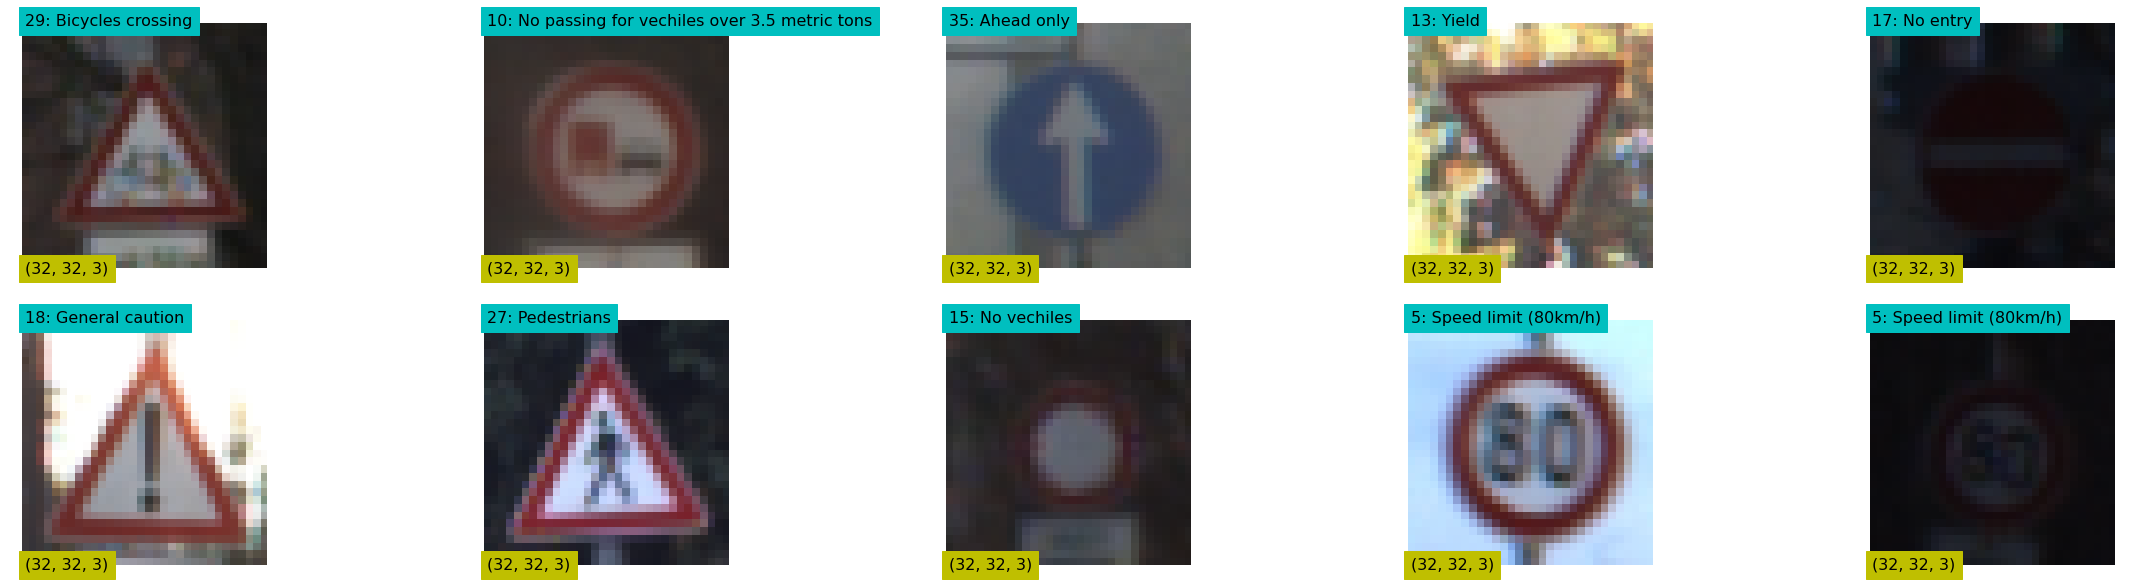

In [ ]:
sample_x, sample_y = get_samples(10)
print("Generating Random samples..")
show_images(sample_x, sample_y, sign_names=SIGN_NAMES, show_shape=True)

Speed limit (50km/h)


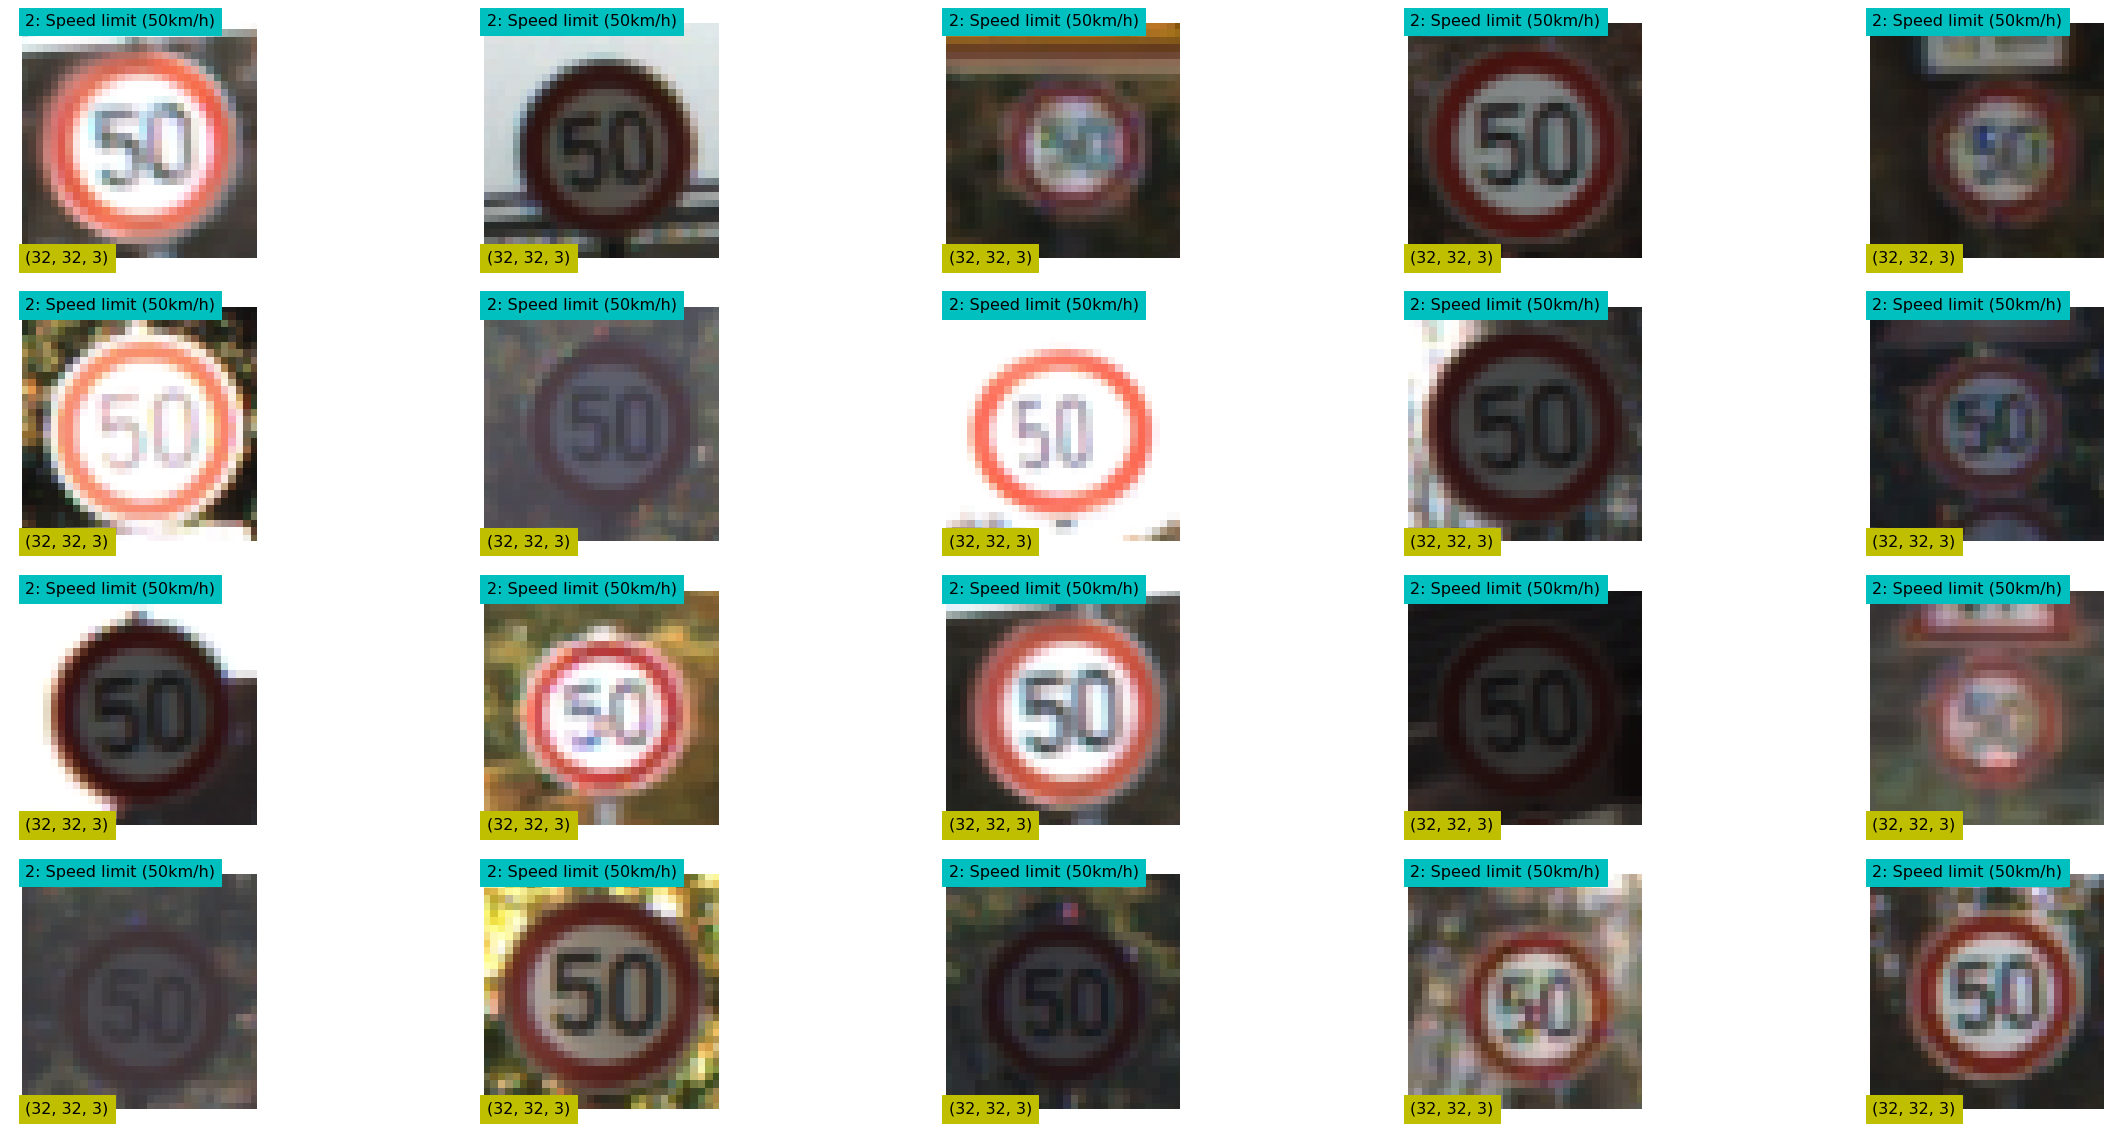

In [ ]:

sample_x_2, sample_y_2 = get_samples(num_samples=20, class_id=2)
print(SIGN_NAMES[2])
show_images(sample_x_2, sample_y_2, sign_names=SIGN_NAMES, show_shape=True)

In [ ]:
def preprocess_dataset(X, y, one_hot=False):
    '''
    - convert images to grayscale, 
    - scale from [0, 255] to [0, 1] range, 
    - use localized histogram equalization as images differ 
      in brightness and contrast significantly
    ADAPTED FROM: http://navoshta.com/traffic-signs-classification/
    '''

    #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]

    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
    
    #adjust histogram
    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            X[i] = exposure.equalize_adapthist(X[i]) 
    
    if one_hot:
        # Convert to one-hot encoding. Convert back with `y = y.nonzero()[1]`
        y = np.eye(43)[y]
    
    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X, y

def makeDict(X, y):
    return {'features': X, 'labels': y}

def retriveDataFromDict(dictn):
  return dictn['features'], dictn['labels']

In [ ]:
## Please run this only first time and save the data into file
## so next time, we can directly load from file.

print("Preprocessing the data to improve feature extraction...")
print("This might take a while...")

X_train_preprocessed, y_train_preprocessed = preprocess_dataset(X_train, y_train)
print("training set preprocessing complete!", X_train_preprocessed.shape)

X_valid_preprocessed, y_valid_preprocessed = preprocess_dataset(X_valid, y_valid)
print("cross validation set preprocessing complete!", X_valid_preprocessed.shape)

X_test_preprocessed, y_test_preprocessed = preprocess_dataset(X_test, y_test)
print("test set preprocessing complete!", X_test_preprocessed.shape)

Preprocessing the data to improve feature extraction...
This might take a while...
training set preprocessing complete! (30799, 32, 32, 1)
cross validation set preprocessing complete! (4000, 32, 32, 1)
test set preprocessing complete! (12630, 32, 32, 1)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training_preprocessed_file.txt to training_preprocessed_file.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving testing_preprocessed_file.txt to testing_preprocessed_file.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving validation_preprocessed_file.txt to validation_preprocessed_file.txt


In [ ]:
# Save the preprocessed data set, so we don't have to preprocess it everytime 

pickle.dump(makeDict(X_train_preprocessed, y_train_preprocessed), open('training_preprocessed_file.txt', "wb" ))
pickle.dump(makeDict(X_valid_preprocessed, y_valid_preprocessed), open('validation_preprocessed_file.txt', "wb" ))
pickle.dump(makeDict(X_test_preprocessed, y_test_preprocessed), open('testing_preprocessed_file.txt', "wb" ))

In [ ]:
with open('training_preprocessed_file.txt', mode='rb') as f:
    X_train_preprocessed, y_train_preprocessed = retriveDataFromDict(pickle.load(f))
with open('validation_preprocessed_file.txt', mode='rb') as f:
    X_valid_preprocessed, y_valid_preprocessed = retriveDataFromDict(pickle.load(f))
with open('testing_preprocessed_file.txt', mode='rb') as f:
    X_test_preprocessed, y_test_preprocessed = retriveDataFromDict(pickle.load(f))

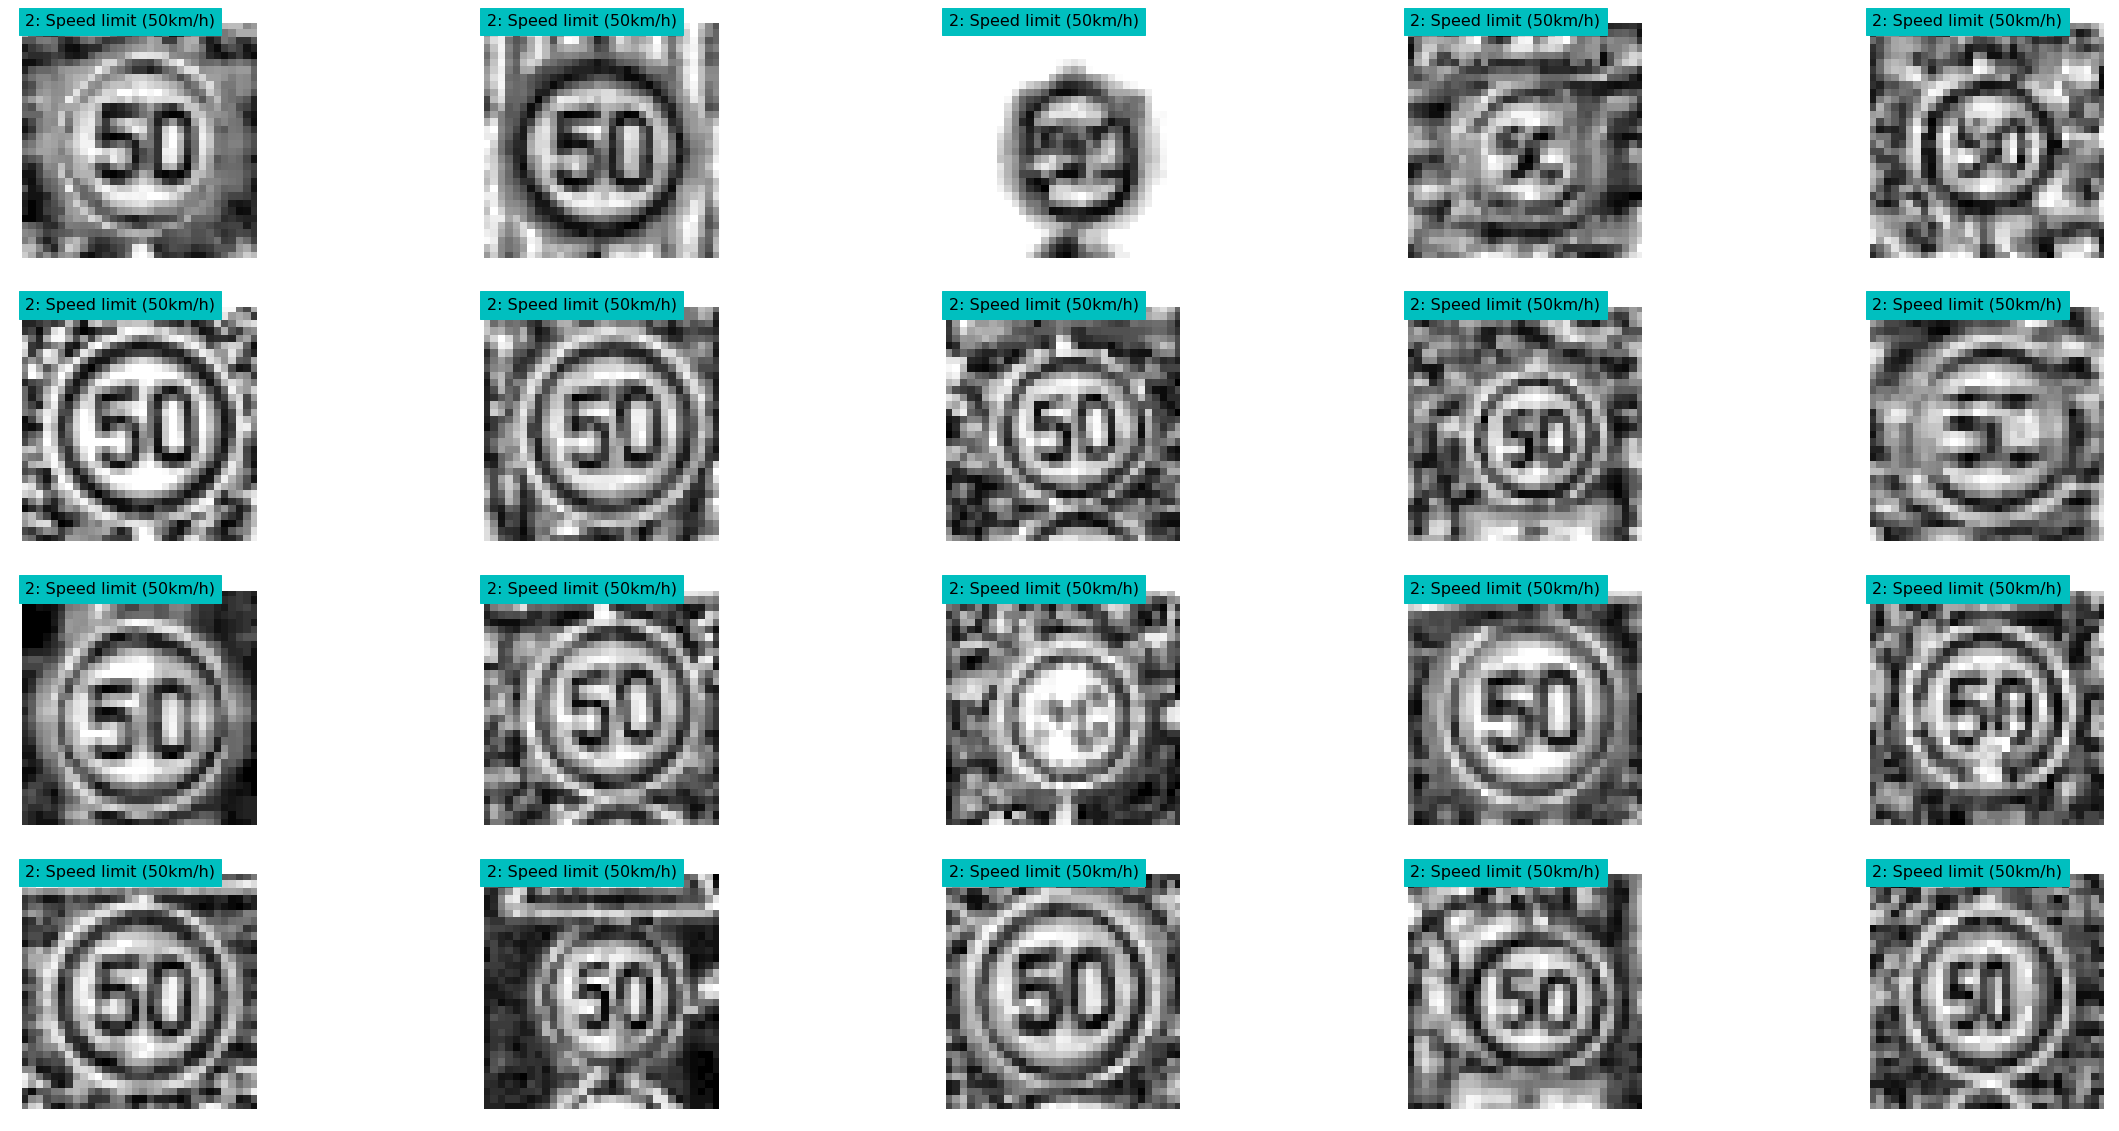

In [ ]:
sample_x_2, sample_y_2 = get_samples(num_samples=20, class_id=2)
sample_x_2_preprocessed, sample_y_2_preprocessed = preprocess_dataset(sample_x_2, sample_y_2, one_hot=False)
show_images(sample_x_2_preprocessed, sample_y_2_preprocessed, sign_names=SIGN_NAMES, show_shape=False)

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

In [ ]:
def run_LeNet_with_normalized_data():

    BATCH_SIZE = 128
    NUMBER_OF_TRAINING_DATA = X_train_preprocessed.shape[0]
    EPOCHS = 20
    DIR = 'Saved_Models'

    LeNet_Model_norm = LaNet(n_out = 43, input_channels = 1)
    model_name = "LeNet_normalized"
    validation_accuracy_figure = []
    train_accuracy_figure = []

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(y_train_preprocessed)
        print("Training ...")
        print()
        for epoch in range(EPOCHS):
            X_data, y_data = shuffle(X_train_preprocessed, y_train_preprocessed)
            for offset in range(0, NUMBER_OF_TRAINING_DATA, BATCH_SIZE):
                batch_x, batch_y = LeNet_Model_norm.get_batch(X_data, y_data, offset, BATCH_SIZE) 
                _, loss = sess.run([LeNet_Model_norm.training_operation, LeNet_Model_norm.loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})

            validation_accuracy = LeNet_Model_norm.evaluate(X_valid_preprocessed, y_valid_preprocessed)
            validation_accuracy_figure.append(validation_accuracy)

            train_accuracy = LeNet_Model_norm.evaluate(X_train_preprocessed, y_train_preprocessed)
            train_accuracy_figure.append(train_accuracy)

            print("Epoch: {:3d},".format(epoch), "Train Acc: {:.3f}, ".format(train_accuracy), 
                  "Validation Acc: {:.3f}, ".format(validation_accuracy), 
                  "loss: {:.3f}".format(loss))
        LeNet_Model_norm.saver.save(sess, os.path.join(DIR, model_name))
        print("Model saved")

    return LeNet_Model_norm, train_accuracy_figure, validation_accuracy_figure

In [ ]:
LeNet_Model_norm, train_accuracy_norm, validation_accuracy_norm = run_LeNet_with_normalized_data()

Training ...

Epoch:   0, Train Acc: 0.803,  Validation Acc: 0.802,  loss: 0.783
Epoch:   1, Train Acc: 0.898,  Validation Acc: 0.900,  loss: 0.220
Epoch:   2, Train Acc: 0.926,  Validation Acc: 0.926,  loss: 0.332
Epoch:   3, Train Acc: 0.954,  Validation Acc: 0.955,  loss: 0.159
Epoch:   4, Train Acc: 0.961,  Validation Acc: 0.956,  loss: 0.110
Epoch:   5, Train Acc: 0.954,  Validation Acc: 0.945,  loss: 0.178
Epoch:   6, Train Acc: 0.977,  Validation Acc: 0.967,  loss: 0.126
Epoch:   7, Train Acc: 0.978,  Validation Acc: 0.967,  loss: 0.061
Epoch:   8, Train Acc: 0.976,  Validation Acc: 0.964,  loss: 0.076
Epoch:   9, Train Acc: 0.983,  Validation Acc: 0.970,  loss: 0.059
Epoch:  10, Train Acc: 0.991,  Validation Acc: 0.978,  loss: 0.022
Epoch:  11, Train Acc: 0.976,  Validation Acc: 0.964,  loss: 0.081
Epoch:  12, Train Acc: 0.992,  Validation Acc: 0.975,  loss: 0.071
Epoch:  13, Train Acc: 0.991,  Validation Acc: 0.976,  loss: 0.023
Epoch:  14, Train Acc: 0.995,  Validation Acc: 0

In [ ]:
# EVALUATE USING TEST DATA 
with tf.Session() as sess:
    LeNet_Model_norm.saver.restore(sess, os.path.join('Saved_Models', "LeNet_normalized"))
    y_pred_preprocessed = LeNet_Model_norm.y_predict(X_test_preprocessed)
    test_accuracy = sum(y_test_preprocessed == y_pred_preprocessed)/len(y_test_preprocessed)
    print("Test Accuracy = {:.1f}%".format(test_accuracy*100))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from Saved_Models/LeNet_normalized
Test Accuracy = 89.4%


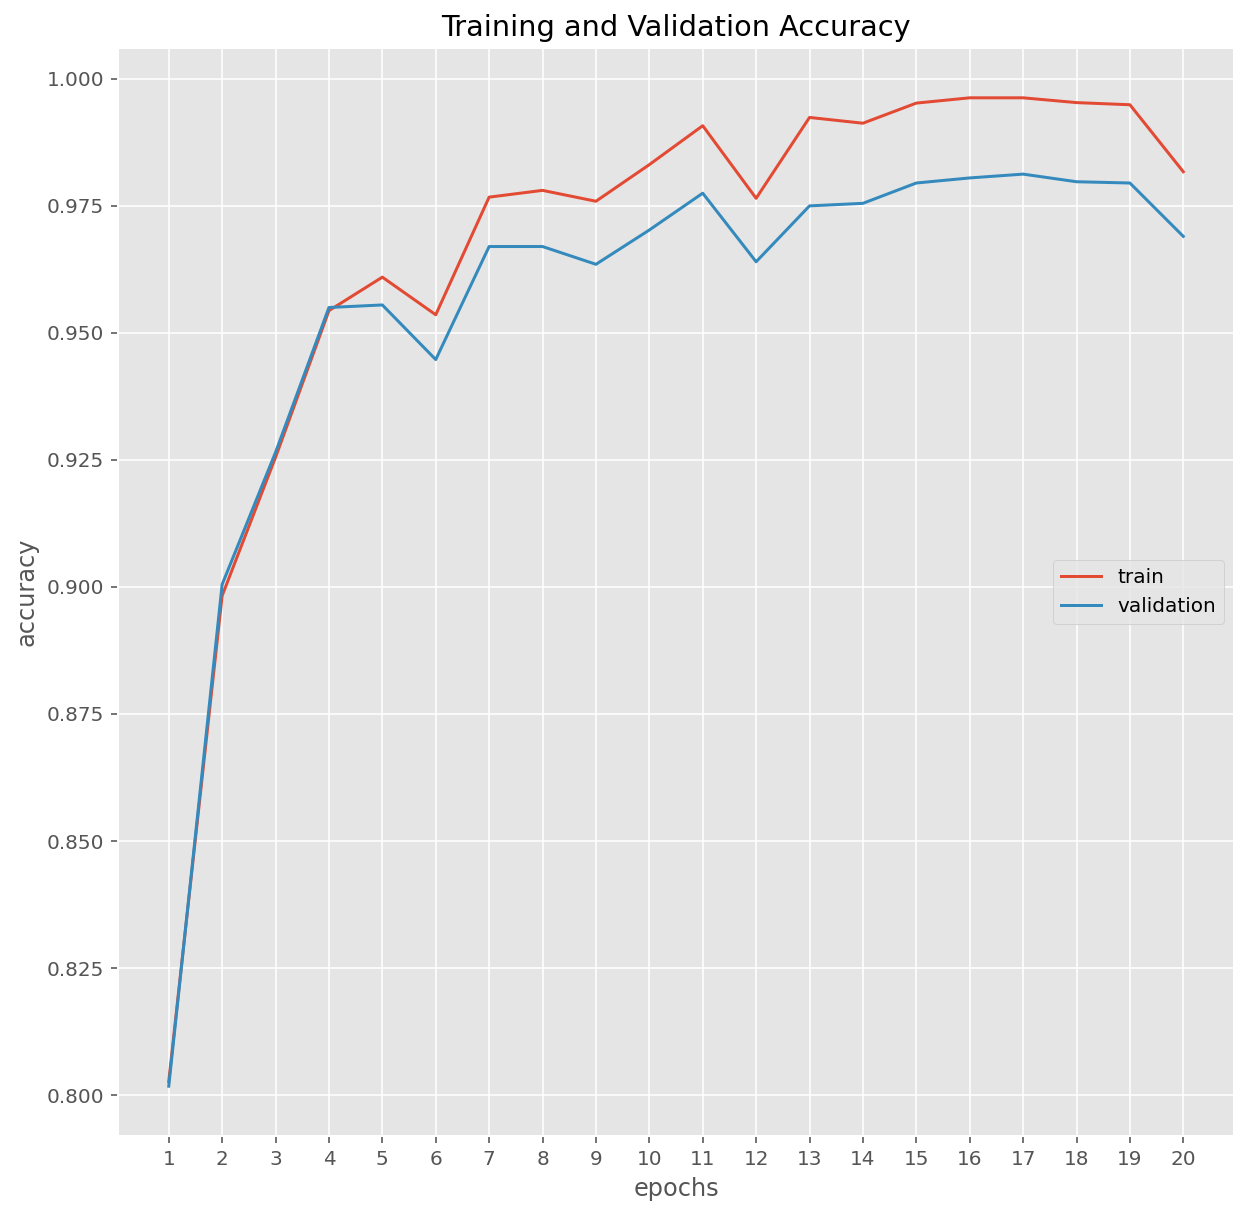

In [ ]:
show_learning_curve(train_accuracy_norm, validation_accuracy_norm)

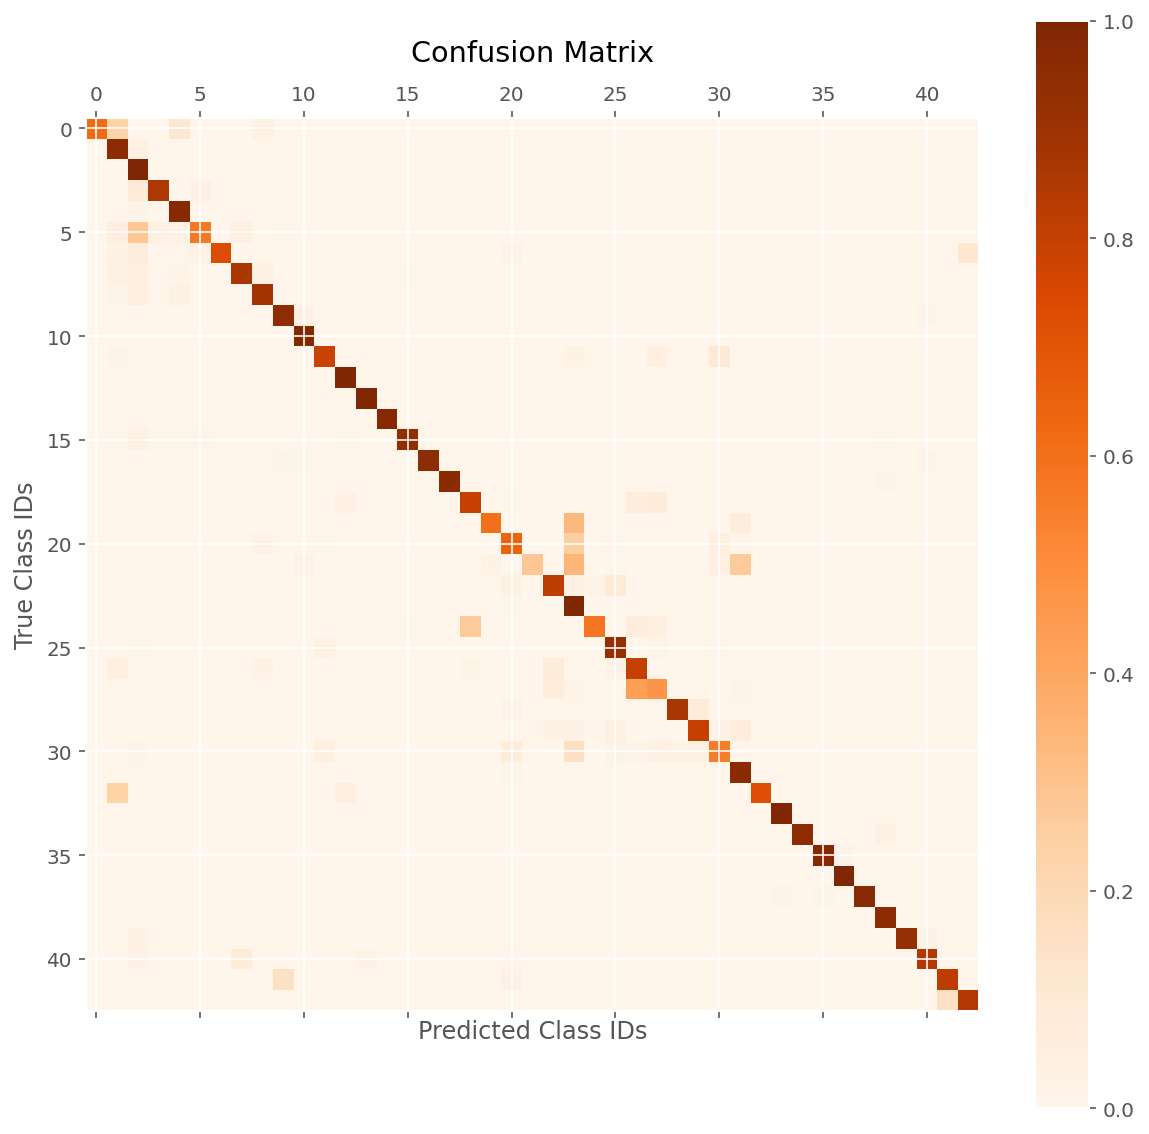

36 Go straight or right                               100.00%  292
 2 Speed limit (50km/h)                                99.73% 1779
13 Yield                                               99.44% 1699
23 Slippery road                                       99.33%  398
33 Turn right ahead                                    99.05%  530
12 Priority road                                       98.84% 1673
10 No passing for vechiles over 3.5 metric tons        98.79% 1593
35 Ahead only                                          97.44%  956
14 Stop                                                97.41%  611
 4 Speed limit (70km/h)                                97.12% 1567
37 Go straight or left                                 96.67%  159
31 Wild animals crossing                               95.93%  611
17 No entry                                            95.83%  876
 1 Speed limit (30km/h)                                95.56% 1752
38 Keep right                                          95.51% 

In [ ]:
cm_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_preprocessed)
plot_confusion_matrix(cm_preprocessed)
print_confusion_matrix(cm_preprocessed)

In [ ]:
# Read the images

def get_new_test_images(folder_name):
    i=1
    images_sign = list()
    labels_sign = list()
    for line in open(folder_name + '/data.txt','r'):
        fname, label = line.strip().split(' ')
        label = int(label)
        fname = folder_name + '/' + fname
        img = cv2.imread(fname)
        # Our images are of different sizes so we need to convert them into 32x32 size.
        img = cv2.resize(img, (32,32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        images_sign.append(img)
        labels_sign.append(label)

    images = np.array(images_sign)
    labels = np.array(labels_sign)
    
    return images, labels

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
images, labels = get_new_test_images('/content/gdrive/My Drive/my_sign_images')

In [ ]:
import skimage
from skimage import io
import glob

i=1
plt.figure(figsize=(20,15))
for el in glob.glob('./my_sign_images/*.png') + glob.glob('./my_sign_images/*.jpg'):
    print(el)
    img = io.imread(el)    
    
    plt.subplot(1,10,i)
    plt.imshow(img)
    i+=1
    plt.axis('off')
    
plt.savefig('/content/gdrive/My Drive/images/new_images.png',bbox_inches='tight')

<Figure size 1440x1080 with 0 Axes>

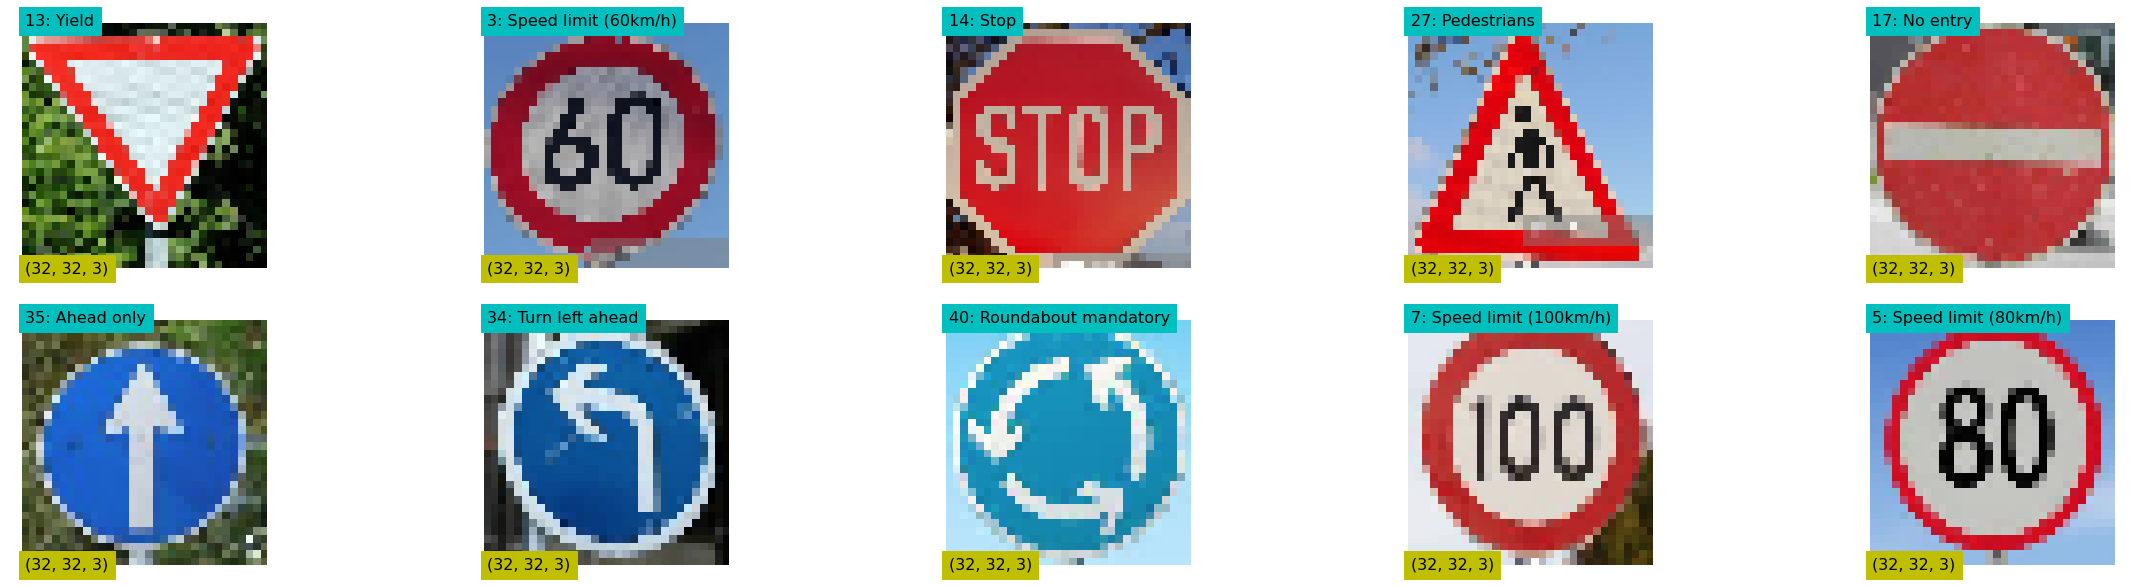

In [ ]:
show_images(images, labels, cols=5, sign_names=SIGN_NAMES, show_shape=True)

INFO:tensorflow:Restoring parameters from Saved_Models/LeNet_normalized


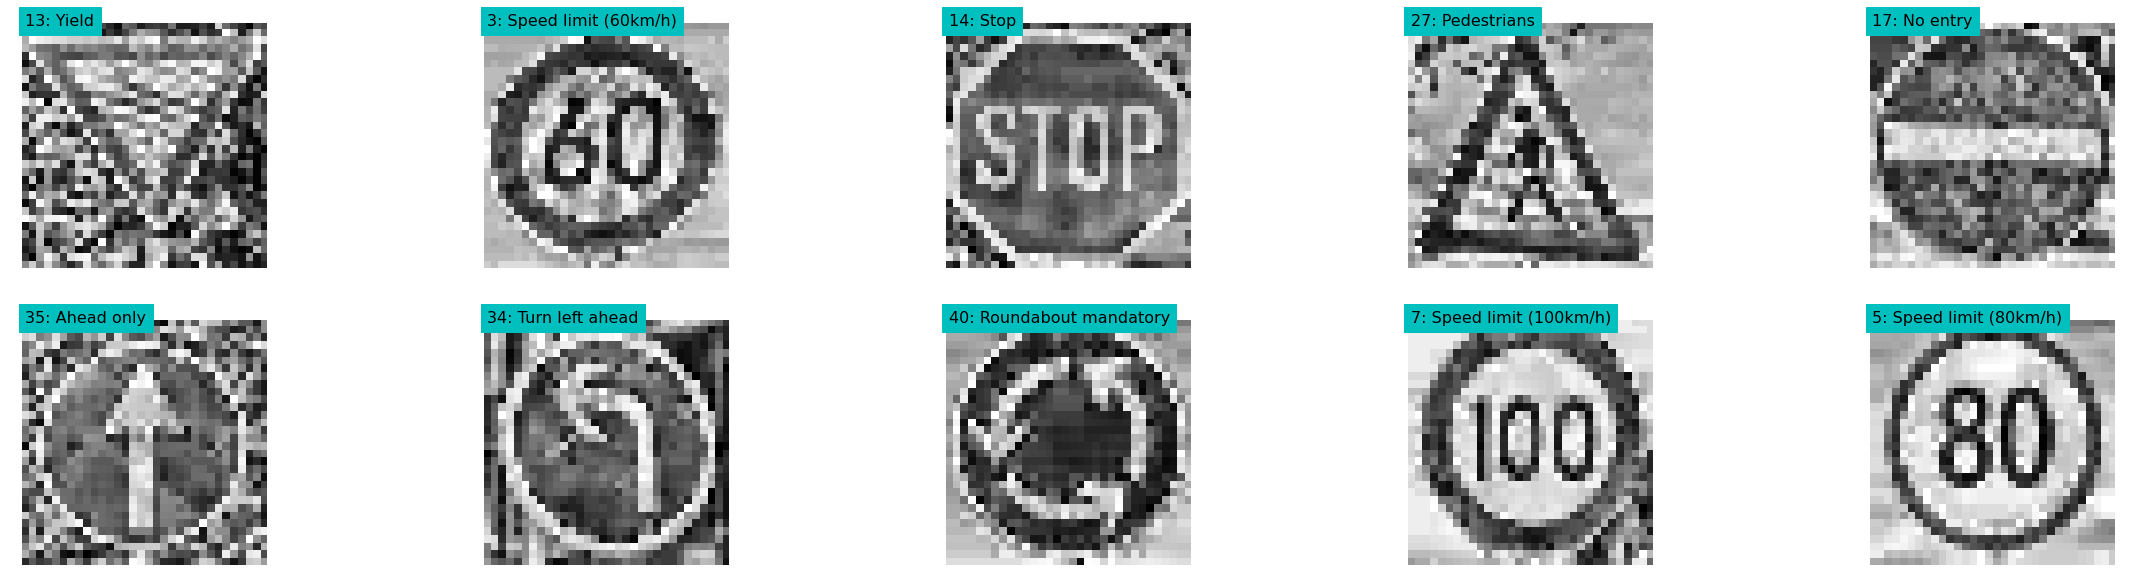

In [ ]:
X_test_new, y_test_new = preprocess_dataset(images, labels)
show_images(X_test_new, y_test_new, cols=5, sign_names=SIGN_NAMES, show_shape=False)

def y_predict_model(Input_data, top_k=5):
    """
    Generates the predictions of the model over the input data, and outputs the top softmax probabilities.
    Parameters:
        X_data: Input data.
        top_k (Default = 5): The number of top softmax probabilities to be generated.
    """
    num_examples = len(Input_data)
    y_pred = np.zeros((num_examples, top_k), dtype=np.int32)
    y_prob = np.zeros((num_examples, top_k))
    with tf.Session() as sess:
        LeNet_Model_norm.saver.restore(sess, os.path.join('Saved_Models', "LeNet_normalized"))
        y_prob, y_pred = sess.run(tf.nn.top_k(tf.nn.softmax(LeNet_Model_norm.logits), k=top_k), 
                             feed_dict={x:Input_data, keep_prob:1})
    return y_prob, y_pred

y_prob, y_pred = y_predict_model(X_test_new)

New Images Test Accuracy = 50.0%


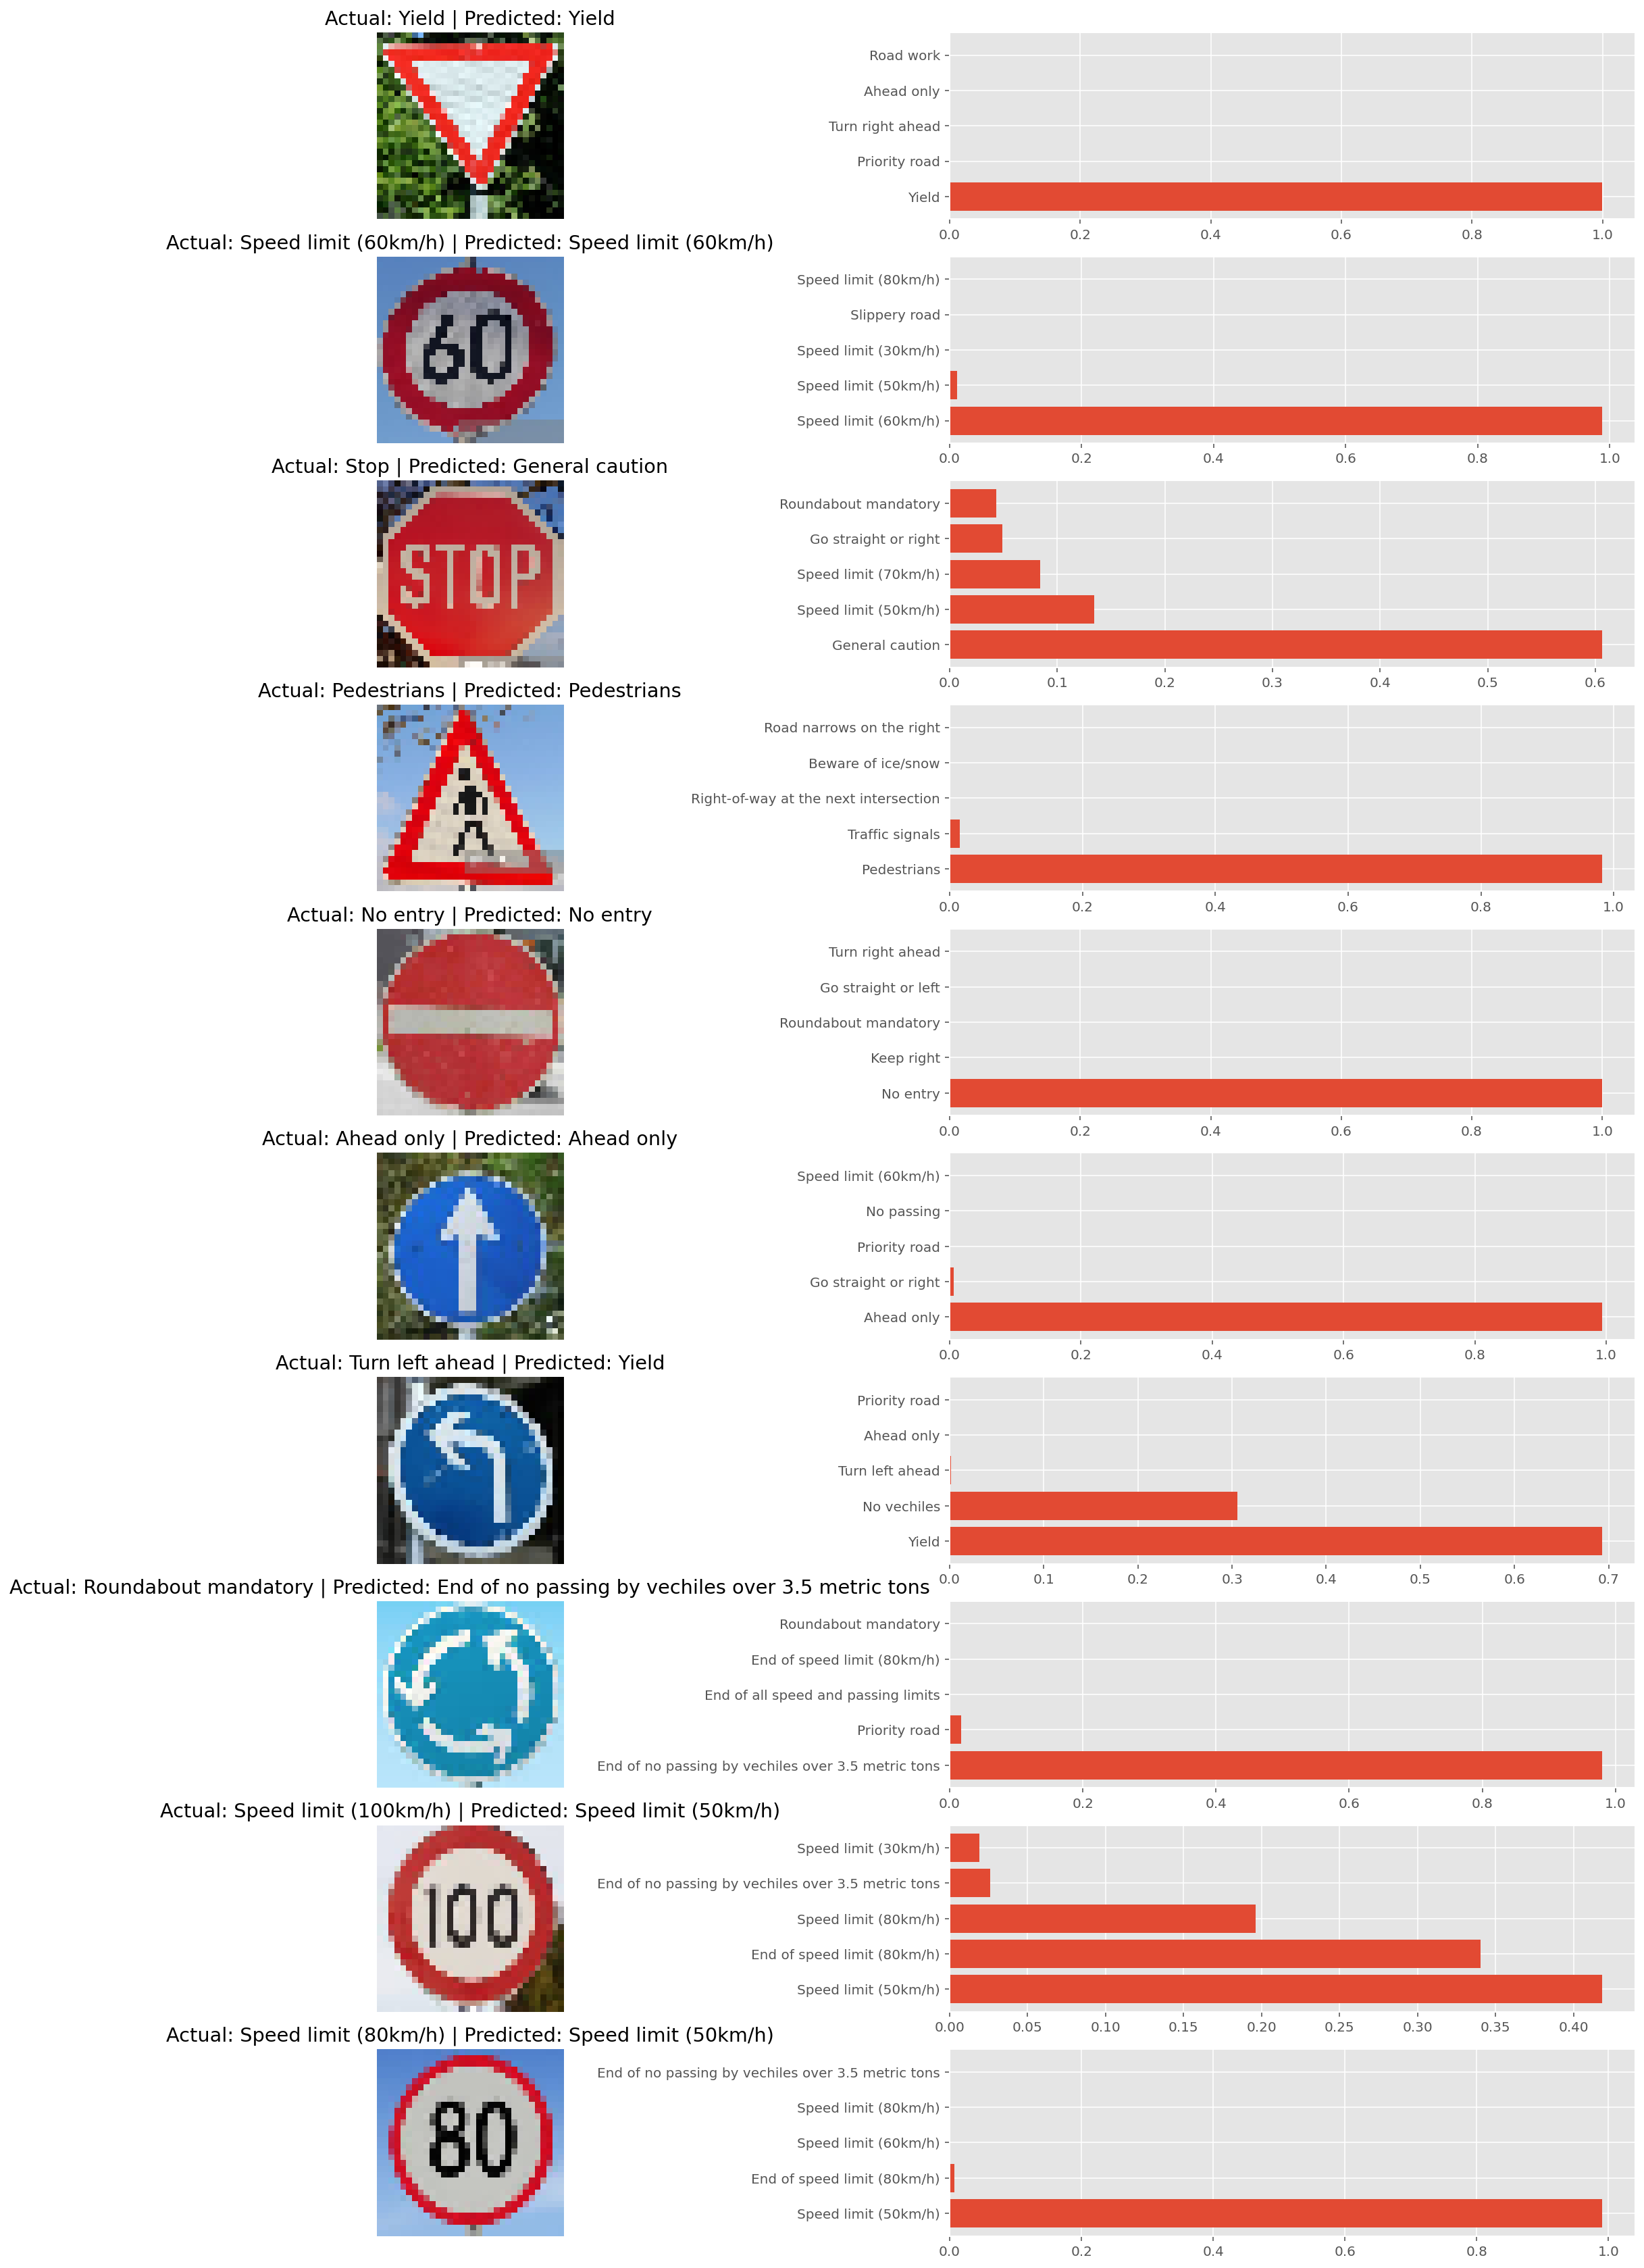

In [ ]:
test_accuracy = 0
for i in range(len(X_test_new)):
    accu = y_test_new[i] == np.asarray(y_pred[i])[0]
    if accu == True:
        test_accuracy += 0.1
print("New Images Test Accuracy = {:.1f}%".format(test_accuracy*100))

plt.figure(figsize=(20, 30))
for i in range(len(X_test_new)):
    plt.subplot(len(X_test_new), 2, 2*i+1)
#     print(images[i].shape)
    plt.imshow(images[i]) 
    plt.title('Actual: ' + get_name_from_label(y_test_new[i]) + ' | Predicted: ' + get_name_from_label(y_pred[i][0]))
    plt.axis('off')
    plt.subplot(len(X_test_new), 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), y_prob[i, :])
    labels = [get_name_from_label(j) for j in y_pred[i]]
    plt.yticks(np.arange(1, 6, 1), labels)
plt.show()